In [ ]:
from nbodykit.lab import *
import pandas as pd
import numpy as np

zmin, zmax = 0.01, 0.15

# Load your data and randoms as Pandas DataFrames
sdss = pd.read_csv('../data/sdss_zmin_0.000_zmax_0.300_sigma_5.0.csv')
sdss  = sdss[(sdss["red"] > zmin)&(sdss["red"] < zmax)]
randoms = pd.read_csv('../data/random_sample_healpy_128_561286.csv')  # Replace with your randoms CSV file path

# Convert DataFrames to ArrayCatalog with RA, DEC, and Redshift
data_cat = ArrayCatalog({'RA': sdss['ra'].values,
                         'DEC': sdss['dec'].values,
                         'Redshift': sdss['red'].values})

rand_cat = ArrayCatalog({'RA': randoms['ra'].values,
                         'DEC': randoms['dec'].values,
                         'Redshift': randoms['red'].values})

data_cat['RA'] = np.radians(data_cat['RA'])
data_cat['DEC'] = np.radians(data_cat['DEC'])
rand_cat['RA'] = np.radians(rand_cat['RA'])
rand_cat['DEC'] = np.radians(rand_cat['DEC'])

# Assign cosmology (if not already in the data)
cosmo = cosmology.Planck15

# Define the edges for s and mu bins
s_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]  # smaller range for simplicity
mu_bins = 9  # fewer bins for testing

# Define the SurveyData2PCF object
result = SurveyData2PCF('2d', data_cat, rand_cat, edges=s_bins, Nmu=mu_bins, cosmo=cosmo, ra='RA', dec='DEC', redshift='Redshift')

# Access the computed correlation function
xi_s_mu = result.corr.data  # 2D correlation function values
s = result.corr.coords['r']  # The s bins
mu = result.corr.coords['mu']  # The mu bins

# Save or print results
print("s:", s)
print("mu:", mu)
print("xi(s, mu):", xi_s_mu)

# Optionally save the results to a file
np.savez('xi_s_mu_results.npz', s=s, mu=mu, xi_s_mu=xi_s_mu)



In [8]:
import matplotlib.pyplot as plt
import numpy as np

#Load the results (if saved) or use the variables directly
data = np.load('xi_s_mu_results.npz')
s = data['s']
mu = data['mu']
xi_s_mu = data['xi_s_mu']


In [15]:
print(s)
print(mu)
print(len(xi_s_mu))

[15. 25. 35. 45. 55. 65. 75. 85. 95.]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95]
9


In [28]:
xi_s_mu.T

array([[0.35442408, 0.1859781 , 0.12153627, 0.06060545, 0.03502951,
        0.03154016, 0.03327069, 0.03278876, 0.02202391],
       [0.35114684, 0.18461867, 0.11815254, 0.06651783, 0.04592596,
        0.03597362, 0.03039681, 0.03166052, 0.02244359],
       [0.34554559, 0.1783522 , 0.11264078, 0.0729566 , 0.05057265,
        0.04355568, 0.03281938, 0.02988863, 0.01996676],
       [0.33471633, 0.16371613, 0.10690609, 0.07406432, 0.05405702,
        0.05169715, 0.04214733, 0.03178125, 0.01856829],
       [0.31897617, 0.14929042, 0.09883154, 0.06848555, 0.04793463,
        0.04809323, 0.0357026 , 0.02894589, 0.02088549],
       [0.30271334, 0.1362512 , 0.08793577, 0.06037165, 0.03608408,
        0.03315545, 0.02781609, 0.02692253, 0.02070379],
       [0.28347943, 0.12475604, 0.07253302, 0.05141257, 0.02848438,
        0.02256492, 0.03118797, 0.03209322, 0.02465859],
       [0.26421849, 0.11648542, 0.06021681, 0.04401605, 0.03238836,
        0.0345811 , 0.03855803, 0.03345298, 0.02533798],


In [11]:

# Ensure s and mu are arrays, not edges
s_centers = s#0.5 * (s[1:] + s[:-1])  # Bin centers for s
mu_centers = mu[:-1] # Mu is already centered if Nmu was provided

print(s_centers)
print(mu_centers)

[15. 25. 35. 45. 55. 65. 75. 85. 95.]
[0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85]


TypeError: cannot perform reduce with flexible type

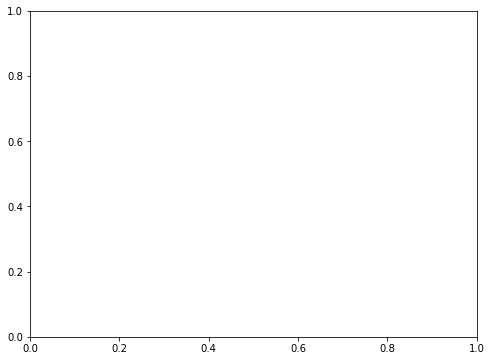

In [20]:

# Create a 2D grid for plotting
s_grid, mu_grid = np.meshgrid(s_centers, mu_centers, indexing='ij')

# Plotting
plt.figure(figsize=(8, 6))
plt.pcolormesh(mu_grid, s_grid, xi_s_mu.T[:-1], shading='auto', cmap='viridis')
plt.colorbar(label=r'$\xi(s, \mu)$')
plt.xlabel(r'$\mu$ (cosine of line of sight angle)')
plt.ylabel(r'$s$ (Mpc/h)')
#plt.title('2D Correlation Function: $\xi(s, \mu)$')
plt.tight_layout()
plt.show()


### ChatGPT

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

# Load the data from the .npz file
file_path = 'xi_s_mu_results.npz'
data = np.load(file_path)

s = data['s']  # Edges of s bins
mu = data['mu']  # Edges of mu bins
xi_s_mu_struct = data['xi_s_mu']  # Structured array for 2D correlation function

# Extract the 'corr' field, which contains the correlation values
xi_s_mu = xi_s_mu_struct['corr']

# Ensure xi_s_mu has the correct shape for (len(s)-1, len(mu)-1)
if xi_s_mu.shape != (len(s) - 1, len(mu) - 1):
    raise ValueError(
        f"Shape of xi_s_mu ({xi_s_mu.shape}) does not match expected shape "
        f"({len(s) - 1}, {len(mu) - 1}). Check your input data."
    )

# Create a 2D meshgrid for plotting
S, MU = np.meshgrid(s[:-1], mu[:-1], indexing='ij')

# Plot xi(s, mu) as a 2D heatmap
plt.figure(figsize=(10, 6))
cmap = plt.get_cmap('viridis')

# Use contourf for a smooth heatmap
cf = plt.contourf(S, MU, xi_s_mu.T, levels=20, cmap=cmap)

# Add a colorbar
cbar = plt.colorbar(cf)
cbar.set_label(r'$\xi(s, \mu)$', fontsize=12)

# Label axes
plt.xlabel(r'$s\, [\mathrm{Mpc}/h]$', fontsize=12)
plt.ylabel(r'$\mu$', fontsize=12)
plt.title(r'2D Correlation Function $\xi(s, \mu)$', fontsize=14)

# Add gridlines
plt.grid(alpha=0.3, linestyle='--')

# Show plot
plt.tight_layout()
plt.show()


ValueError: Shape of xi_s_mu ((9, 10)) does not match expected shape (8, 9). Check your input data.